In [1]:
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
from scipy.stats import spearmanr
import matplotlib.dates as mdates
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import operator
import warnings
import datetime
import calendar
import time
import math
import os
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV file 'PHD-2009-2017.csv' using Pandas
# Specifying the delimiter as semicolon and the encoding as 'latin-1'
data = pd.read_csv('data/PHD-2009-2017.csv',sep=';', encoding='latin-1')
data.head()

,Id,Date,Location,Country,Region,Overall Symptoms,Eye Symptoms,Eye Itching,Eye Foreign Body,Eye Redness,...,SPIR,STEM,TAXU,TILI,TRIG,TRIT,ULMU,URTI,VARI,ZEAM
0,165177,27.03.2017,NaN,RS,yuvojvod,9,2,0,0,0,...,-1.0,-1.0,06.Mär,0.0,-1.0,-1.0,0.5,0.0,-1.0,0.0
1,7402,28.04.2010,NaN,RS,yuvojvod,7,1,1,0,0,...,-1.0,-1.0,2.0,0.0,-1.0,-1.0,0.0,02.Feb,-1.0,0.0
2,24402,21.06.2012,NaN,RS,yuvojvod,7,1,1,0,0,...,-1.0,-1.0,01.Mai,02.Jun,-1.0,-1.0,0.0,134.0,-1.0,0.0
3,7892,14.05.2010,NaN,RS,yuvojvod,9,1,1,0,0,...,-1.0,-1.0,01.Mai,0.0,-1.0,-1.0,0.0,05.Apr,-1.0,0.0
4,7892,15.05.2010,NaN,RS,yuvojvod,9,2,1,0,0,...,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,-1.0,0.0


In [3]:
# Use the isnull() function to identify missing values in the DataFrame 'data'
# Sum the number of missing values in each column using the sum() function
data.isnull().sum()

Id              0
Date            0
Location    30836
Country        64
Region          0
            ...  
TRIT           64
ULMU           64
URTI           64
VARI           64
ZEAM           64
Length: 100, dtype: int64

In [4]:
# Replace all missing values in the DataFrame 'data' with 0 using the fillna() function
data = data.fillna(0)

In [5]:
# Use the shape attribute of the DataFrame 'data' to obtain the number of rows and columns
# Assign the number of rows to m and the number of columns to n
m, n = data.shape
print(f'Number of rows: {m}')
print(f'Number of columns: {n}')

Number of rows: 33136
Number of columns: 100


# Task 1

# Count data entries in available subset of PHD for each user and present them as histogram. Count entries per year and unique number of users per year and present them graphically.

In [6]:
# Initialize empty lists to store dates, years, and months
dates = []
years = []
months = []

# Iterate over each row in the DataFrame 'data'
for i in range(m):
    # Append the date in the second column of each row to the 'dates' list
    dates.append(data.iloc[i, 1])
    
    # Use the datetime module to convert the date string to a datetime object
    g = datetime.datetime.strptime(dates[i], "%d.%m.%Y")
    
    # Append the year of the datetime object to the 'years' list
    years.append(g.year)
    
    # Append the month of the datetime object to the 'months' list
    months.append(g.month)

In [7]:
# Create empty lists to store the number of entries and the years
entries = []
years1 = []

# Iterate over a range from 2009 to 2017 using a for loop
print('Year\tEntries') # Print header for the table
print(' ') # Print a blank line
for i in range(2009, 2018):
    years_counter = years.count(i)

    # Append the number of entries to the entries list
    entries.append(years_counter)

    # Append the current year to the years1 list
    years1.append(i)
    
    # Print the current year and the number of entries for that year
    print(f'{i}\t{entries[-1]}') # Print each row of the table

Year	Entries
 
2009	905
2010	2296
2011	3669
2012	5190
2013	5617
2014	5623
2015	3686
2016	3677
2017	2473


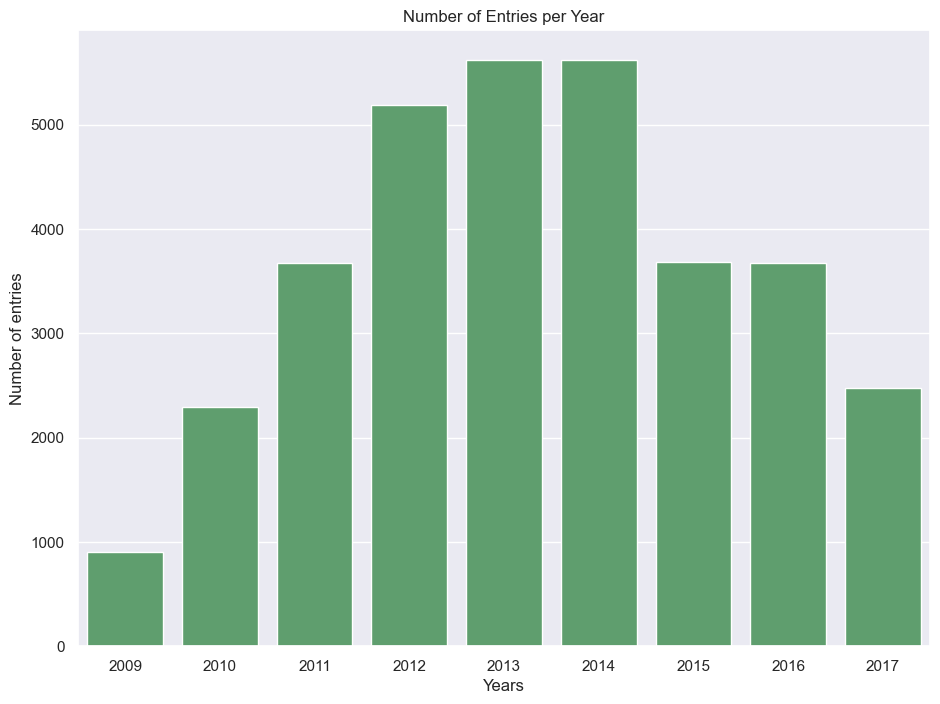

In [8]:
# Set figure size
sns.set(rc={'figure.figsize':(11,8)})

# Create bar plot with years and number of entries
sns.barplot(years1, entries, color='g')

# Add axis labels and title
plt.xlabel('Years')
plt.ylabel('Number of entries')
plt.title('Number of Entries per Year')

# Save the plot as an image
plt.savefig("images/01-number-of-entries-per-year.png", dpi=100)

# Display the plot
plt.show()

The fewest entries were in 2009, while the most were in 2013 and 2014.

In [9]:
def get_unique_ids_count_by_year(target_year, data, years):
    # Create an empty list to store unique IDs for the target year
    unique_ids = []
    
    # Loop through the years and check if it matches the target year
    for i in range(len(years)):
        if years[i] == target_year:
            # If it matches, append the ID to the unique_ids list
            unique_ids.append(data.iloc[i, 0])
            
    # Convert the unique_ids list into a pandas Series and get the value counts
    id_counts = pd.Series(unique_ids).value_counts()
    
    # Return the number of unique IDs
    return id_counts.shape[0]

In [10]:
unique_id_counts = []
for year in range(2009, 2018):
    unique_id_count = get_unique_ids_count_by_year(year, data, years)
    unique_id_counts.append(unique_id_count)

unique_id_counts

[125, 152, 169, 140, 136, 121, 122, 122, 100]

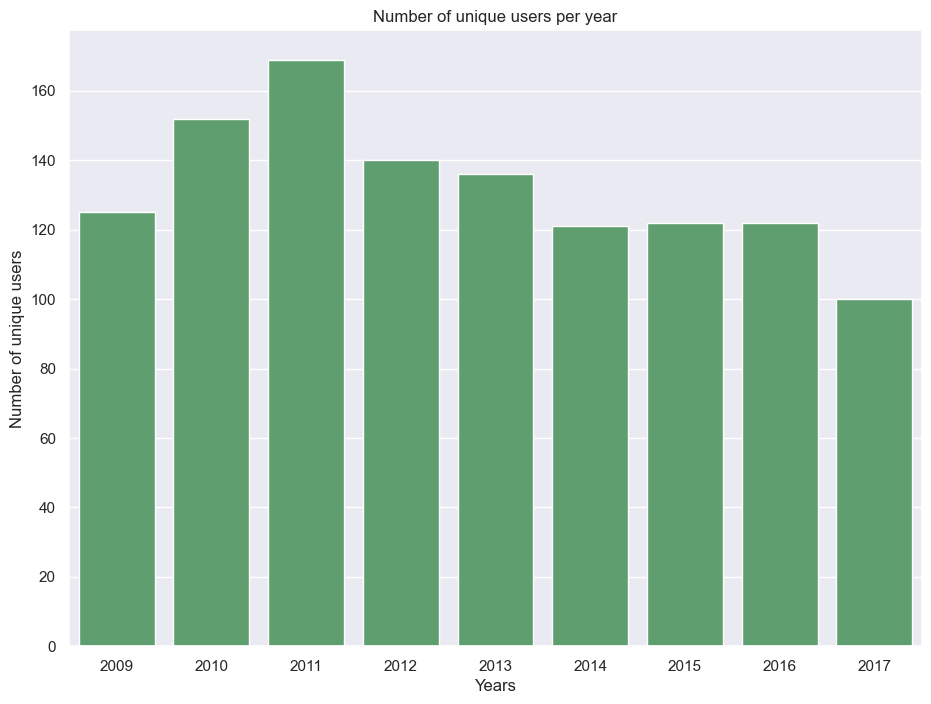

In [11]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(years1, unique_id_counts, color='g')
plt.xlabel('Years')
plt.ylabel('Number of unique users')
plt.title('Number of unique users per year')
plt.savefig("images/02-unique-users-per-year.png", dpi=100)
plt.show()

# Task 2 - Measure correlations between different symptoms Eye Itching, Eye Redness, Nose Sneezing, Lungs Cough,… including also overall symptom score. Present pairwise correlations with heatmap.

In [12]:
data1 = data.iloc[:,6:28] # Making new data frame with the sympthoms.
data1.iloc[:,21] = data.iloc[:,33]
data1.columns.values[21] = "Overall Symptoms Total"

In [13]:
corrmat = data1.corr()
corrmat

,Eye Symptoms,Eye Itching,Eye Foreign Body,Eye Redness,Eye Watering,Eye Total 1,Eye Total 2,Nose Symptoms,Nose Itching,Nose Sneezing,...,Nose Total 1,Nose Total 2,Lungs Symptoms,Lungs Wheezing,Lungs Shortness of Breath,Lungs Cough,Lungs Asthma,Lungs Total 1,Lungs Total 2,Overall Symptoms Total
Eye Symptoms,1.000000,0.751892,0.537832,0.610467,0.586029,0.960287,0.909751,0.621368,0.483052,0.449939,...,0.634301,0.611076,0.333292,0.235048,0.231305,0.229734,0.046332,0.320841,0.320841,0.791877
Eye Itching,0.751892,1.000000,0.335452,0.392036,0.383507,0.794269,0.730786,0.487708,0.492002,0.415824,...,0.534257,0.495657,0.223968,0.177607,0.178137,0.159311,-0.027389,0.213073,0.213073,0.632356
Eye Foreign Body,0.537832,0.335452,1.000000,0.348550,0.249133,0.617920,0.593974,0.336124,0.306000,0.250676,...,0.359110,0.355892,0.160891,0.130461,0.161615,0.100313,0.006555,0.162114,0.162114,0.478603
Eye Redness,0.610467,0.392036,0.348550,1.000000,0.430900,0.706138,0.683996,0.371154,0.333546,0.292120,...,0.407036,0.407672,0.233602,0.178736,0.154361,0.201099,0.136765,0.257258,0.257258,0.565556
Eye Watering,0.586029,0.383507,0.249133,0.430900,1.000000,0.668726,0.619467,0.407854,0.304726,0.337818,...,0.452030,0.422405,0.238096,0.203924,0.159330,0.189634,0.049515,0.243779,0.243779,0.550347
Eye Total 1,0.960287,0.794269,0.617920,0.706138,0.668726,1.000000,0.943876,0.608399,0.515227,0.469440,...,0.644697,0.618767,0.323632,0.245262,0.236568,0.234645,0.050550,0.321003,0.321003,0.810126
Eye Total 2,0.909751,0.730786,0.593974,0.683996,0.619467,0.943876,1.000000,0.622462,0.495195,0.446892,...,0.649869,0.701500,0.372825,0.262855,0.250738,0.288311,0.142954,0.384015,0.384015,0.873510
Nose Symptoms,0.621368,0.487708,0.336124,0.371154,0.407854,0.608399,0.622462,1.000000,0.532611,0.619305,...,0.945404,0.919681,0.387710,0.240030,0.237233,0.298973,0.008905,0.360831,0.360831,0.838430
Nose Itching,0.483052,0.492002,0.306000,0.333546,0.304726,0.515227,0.495195,0.532611,1.000000,0.456443,...,0.651519,0.608662,0.166888,0.151650,0.160773,0.117267,-0.026791,0.166072,0.166072,0.571896
Nose Sneezing,0.449939,0.415824,0.250676,0.292120,0.337818,0.469440,0.446892,0.619305,0.456443,1.000000,...,0.746430,0.693968,0.213175,0.172677,0.146602,0.204292,0.017250,0.221504,0.221504,0.614613


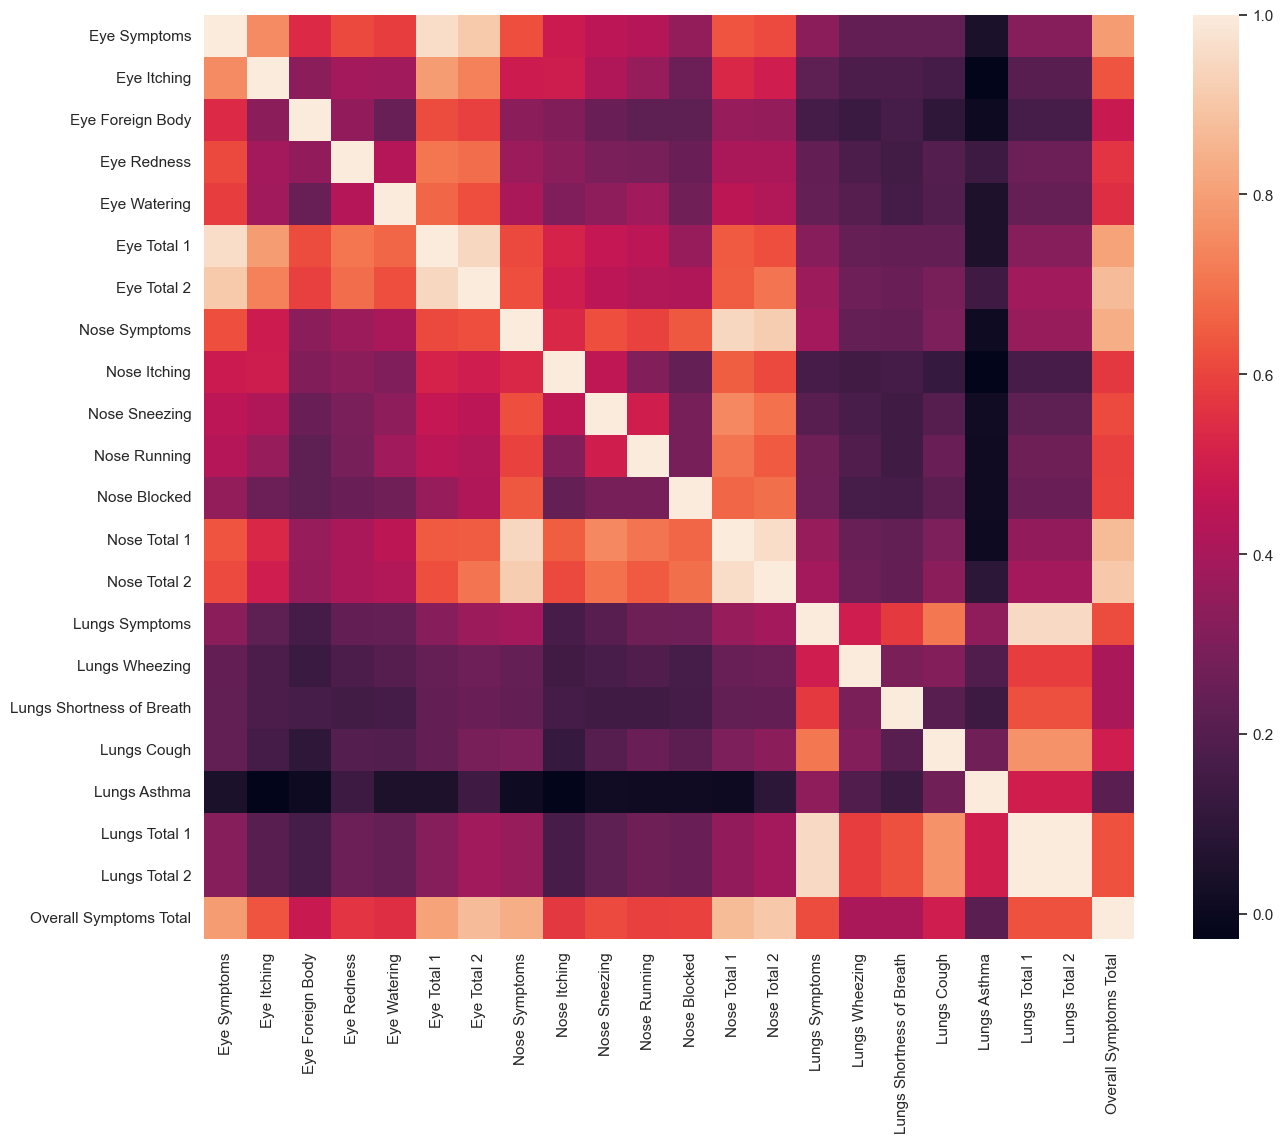

In [14]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(corrmat)
plt.savefig("images/03-heatmap.png", dpi=150)
plt.show()

# Task 3 - Use boxplot to present overall symptoms on month level. Use bar graph to present counts of different medical treatments.

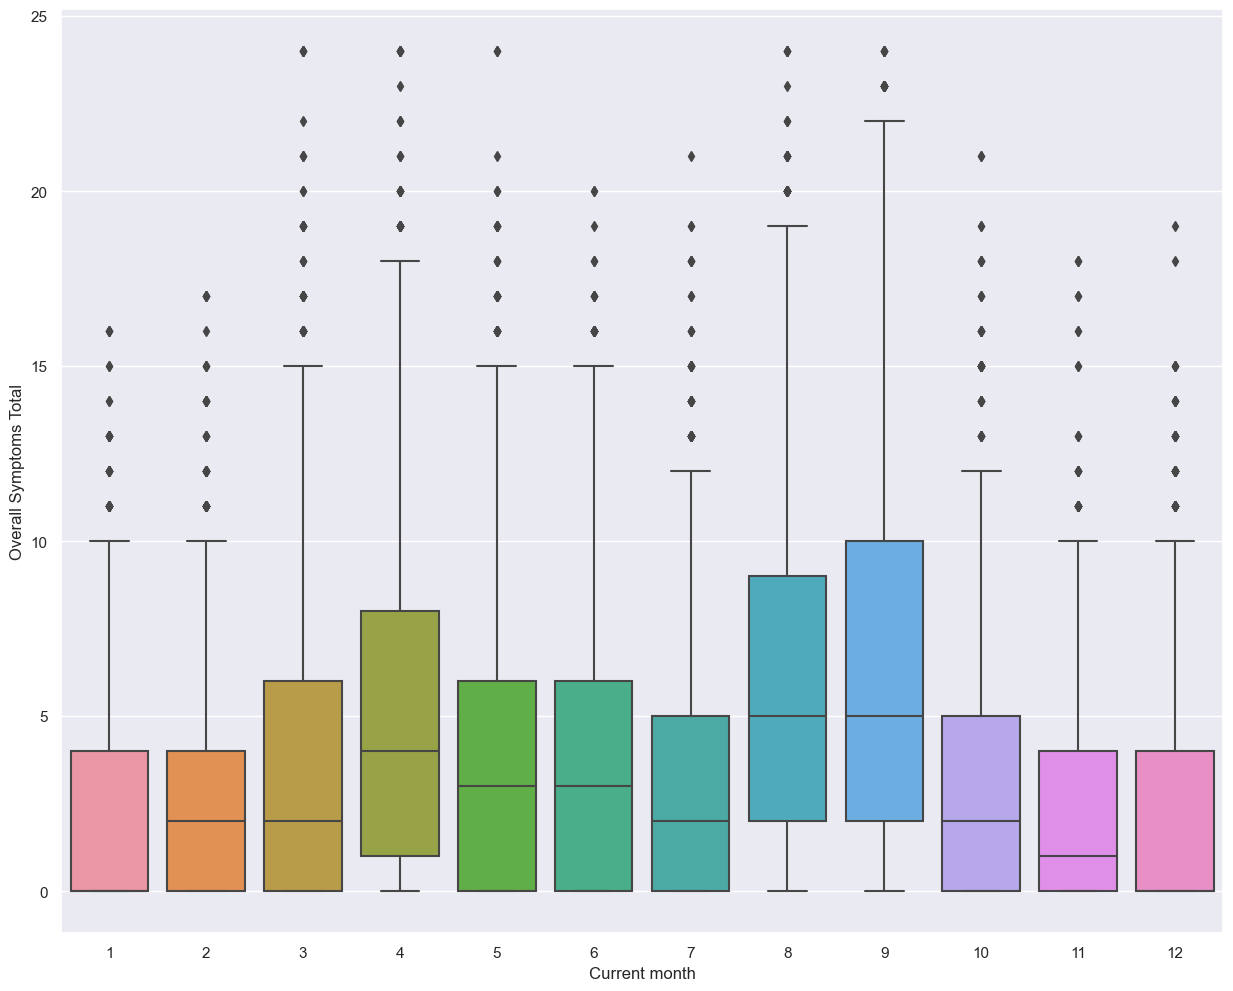

In [15]:
sns.boxplot(months,data.iloc[:,33]) # Column 34 have Overall Symptoms.
plt.xlabel('Current month')
plt.savefig("images/04-boxplot.png", dpi=150)
plt.show()

In [16]:
medicine = []
medicinecount = []
for i in range(27,33):
    medicine.append(data.columns.values[i])
    medicinecount.append(sum(data.iloc[:,i]))

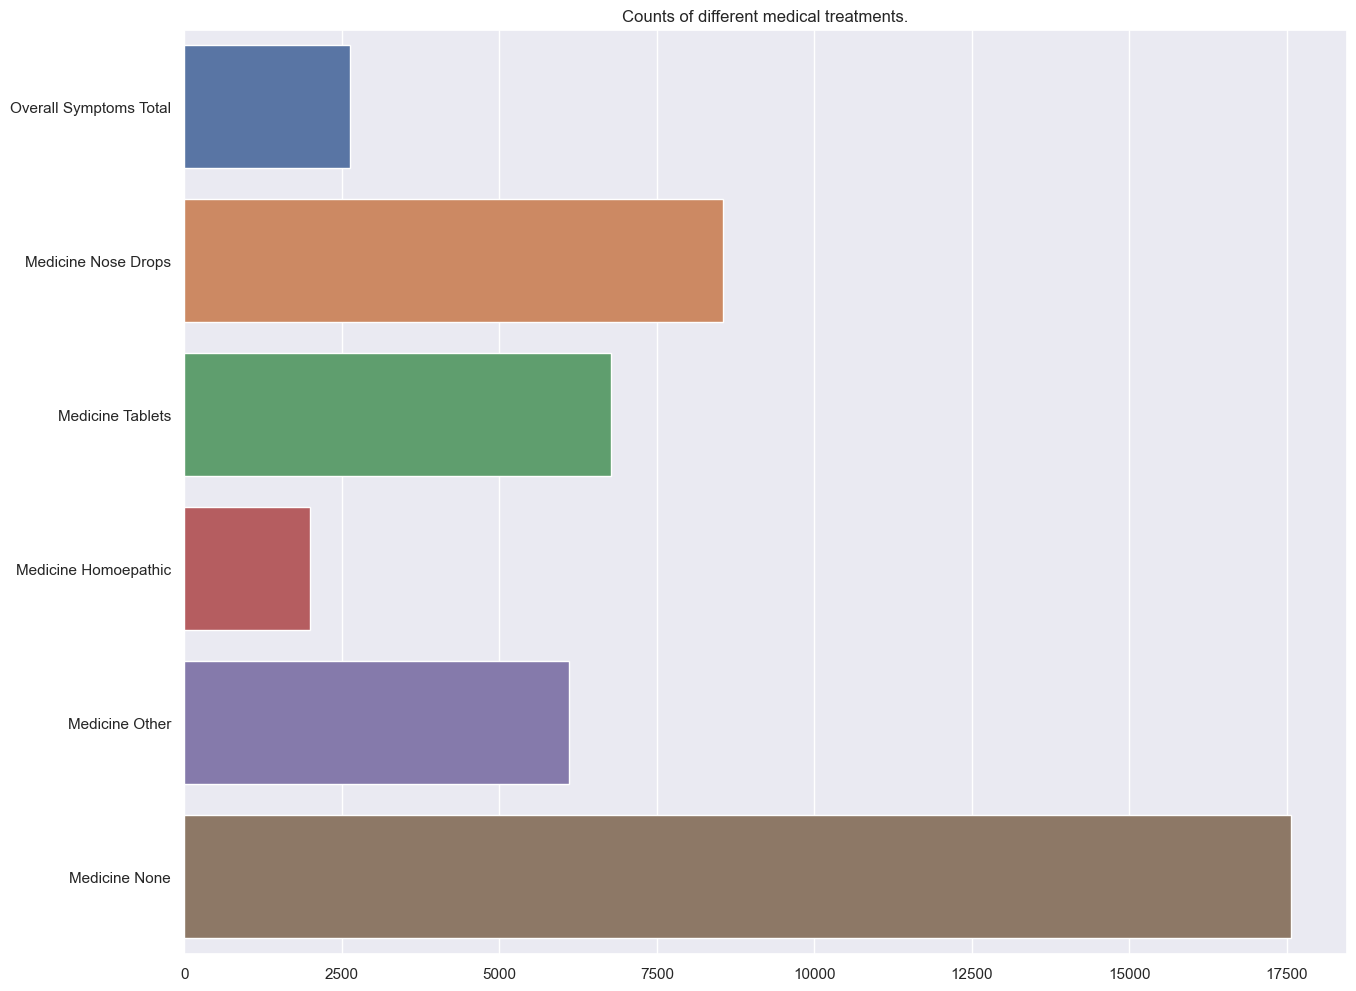

In [17]:
sns.barplot(medicinecount,medicine)
plt.title('Counts of different medical treatments.')
plt.savefig("images/05-counts-of-different-medial-treatments.png", dpi=150)
plt.show()

# Task 4 - Present daily measurements of levels of pollen (individual types of pollen and their overall sum).

In [18]:
rn17 = pd.read_excel('data/RSNOVI2017.xlsx',skiprows=1)
rn16 = pd.read_excel('data/RSNOVI2016.xlsx',skiprows=1)
rn15 = pd.read_excel('data/RSNOVI2015.xlsx',skiprows=1)
rn14 = pd.read_excel('data/RSNOVI2014.xlsx',skiprows=1)
rn13 = pd.read_excel('data/RSNOVI2013.xlsx',skiprows=1)
rn12 = pd.read_excel('data/RSNOVI2012.xlsx',skiprows=1)
rn11 = pd.read_excel('data/RSNOVI2011.xlsx',skiprows=1)
rn10 = pd.read_excel('data/RSNOVI2010.xlsx',skiprows=1)
rn09 = pd.read_excel('data/RSNOVI2009.xlsx',skiprows=1)

m1, n1 = rn17.shape

In [19]:
for i in range(m1): # Replacing string 'na' with zeros (missing values)
    for j in range(n1):
        if rn14.iloc[i,j] == 'na':
            rn14.iloc[i,j] = 0 # In place if rn14 we can insert rn09 to rn17 for different years

In [20]:
def generate(n):
    for i in range(n-1):
        sns.barplot(rn17.iloc[:,0],rn17.iloc[:,i+1])
        plt.xticks(np.linspace(0, 366, 12, endpoint=True)) # Representation of number of month.
        plt.xlabel('Current month')
        plt.show()

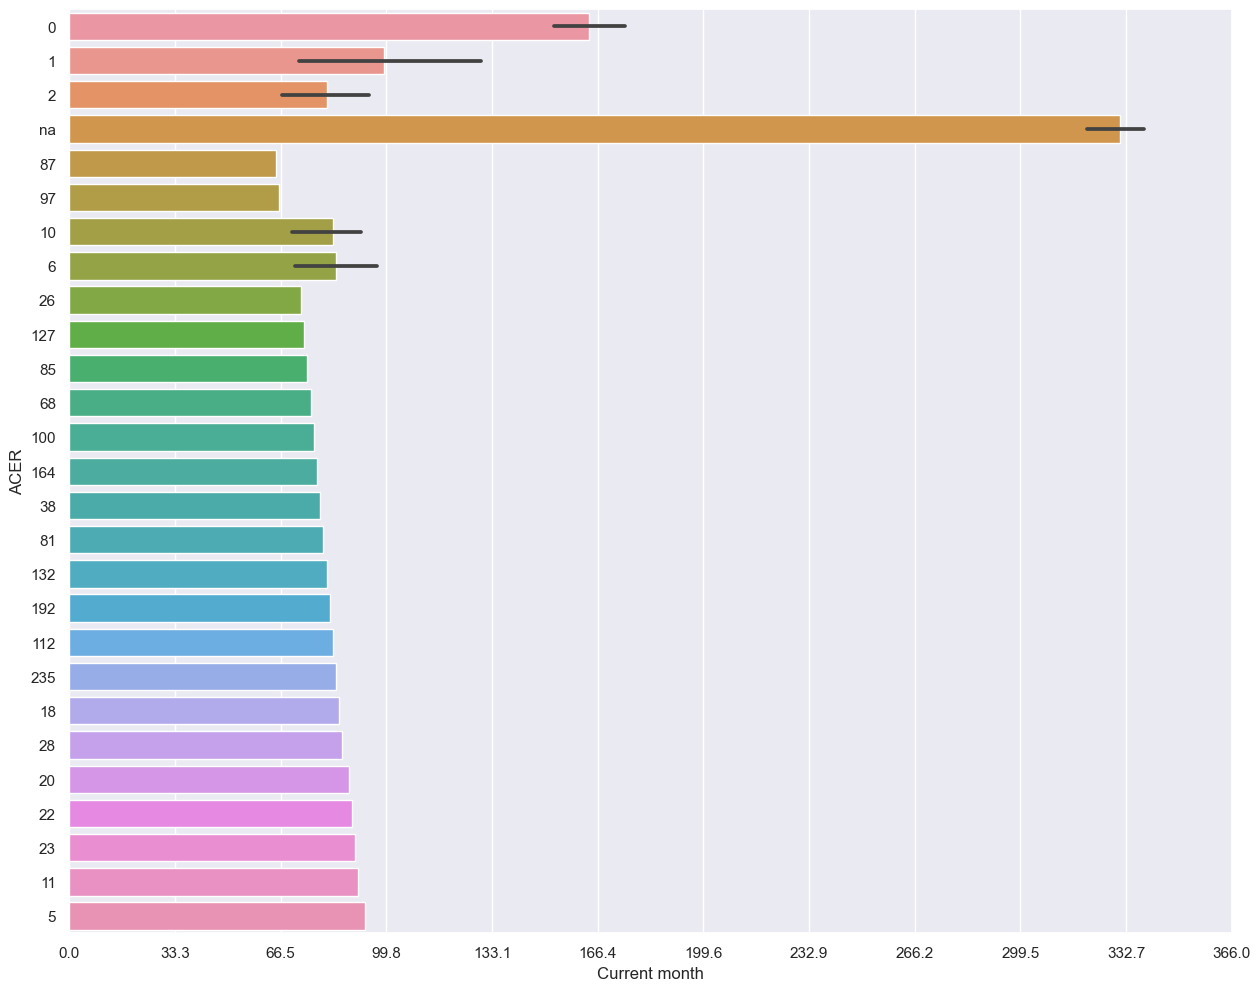

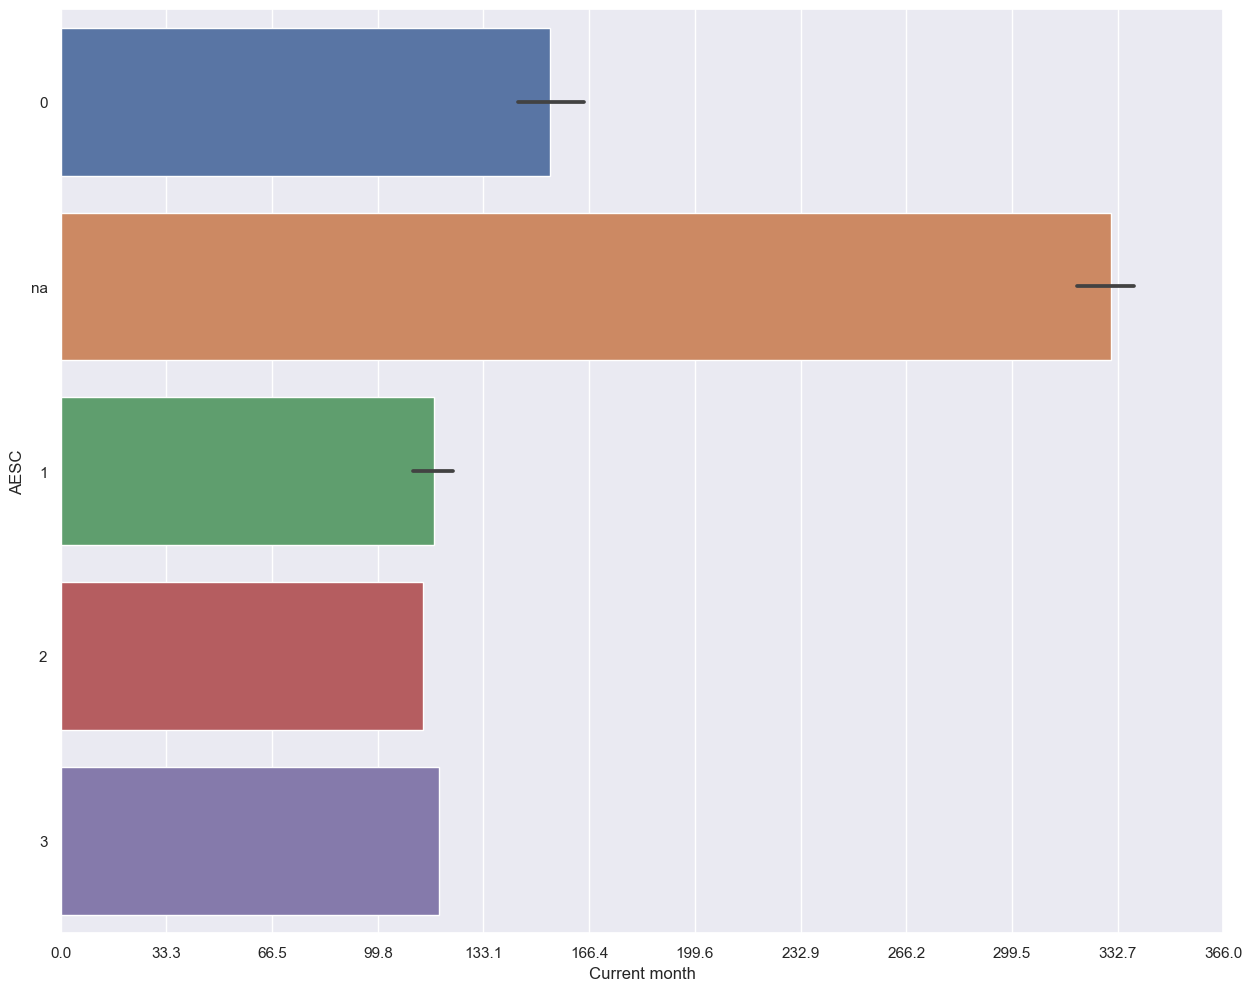

In [21]:
generate(3) # To generate all the data sue n1 in argument.

In [22]:
allinrow = []
for i in range(m1):
    b1 = 0
    for j in range(n1-1):
        b1 += rn14.iloc[i,j+1]
    allinrow.append(b1)

In [23]:
allinrow[:15]

[3, 1, 0, 0, 0, 0, 1, 0, 1, 7, 31, 29, 13, 9, 11]

<function matplotlib.pyplot.show(close=None, block=None)>

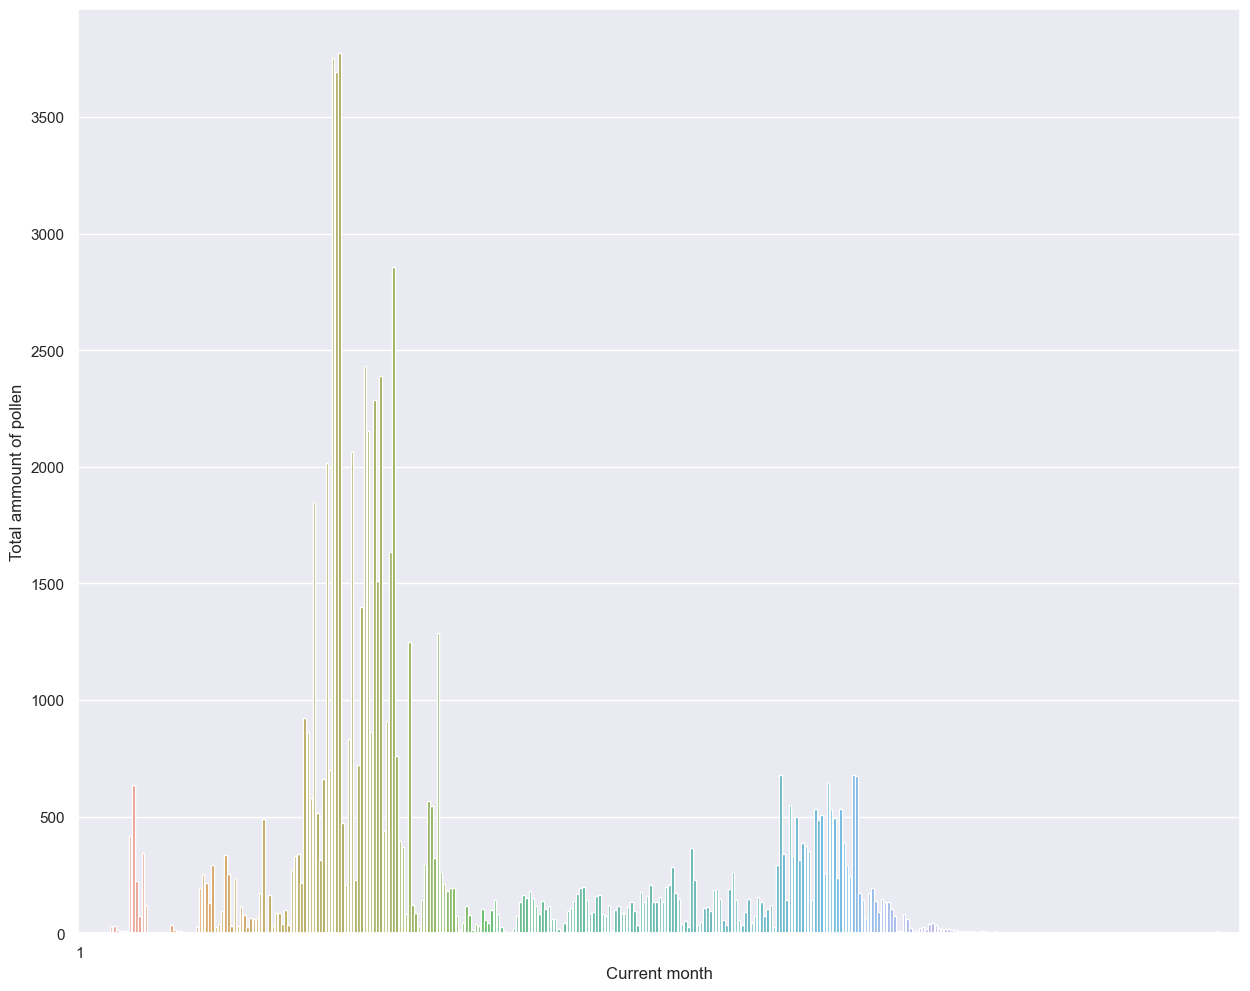

In [24]:
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(rn14.iloc[:,0],allinrow)
plt.xticks(np.linspace(0, 366, 12, endpoint=True))
plt.xlabel('Current month')
plt.ylabel('Total ammount of pollen')
plt.savefig("images/2014polen.png", dpi=150)
plt.show

In [25]:
rn17_1 = rn17.drop('Unnamed: 0', axis='columns')
rn17_1.head()

,ACER,AESC,ALNU,AMBR,ARTE,BETU,BROU,BUXU,CANN,CARP,...,QUER,RUME,SALI,TARA,TAXU,TILI,TYPH,ULMU,URTI,XANT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
for i in range(m1):
    for j in range(n1-1):
        if rn17_1.iloc[i,j] == 'na':
            rn17_1.iloc[i,j] = 0

In [27]:
summ = {}
columns1 = rn17_1.columns.tolist()
m2 = len(columns1)

for i in range(m2-1):
    summ[columns1[i+1]] = sum(rn17_1.iloc[:,i+1])
summ

{'AESC': 18,
 'ALNU': 470,
 'AMBR': 8442,
 'ARTE': 304,
 'BETU': 2827,
 'BROU': 4459,
 'BUXU': 3,
 'CANN': 349,
 'CARP': 46,
 'CAST': 21,
 'CELT': 73,
 'CHEN': 330,
 'CORY': 1280,
 'CYPE': 55,
 'FAGU': 11,
 'FRAX': 1014,
 'IVAA': 16,
 'JUGL': 643,
 'MORU': 7358,
 'PI': 1660,
 'PLAN': 207,
 'PLAT': 3735,
 'POAC': 1468,
 'POPU': 6708,
 'QUER': 1397,
 'RUME': 70,
 'SALI': 5965,
 'TARA': 12,
 'TAXU': 5001,
 'TILI': 216,
 'TYPH': 48,
 'ULMU': 389,
 'URTI': 5293,
 'XANT': 49}

In [28]:
pol1=max(summ.items(), key=operator.itemgetter(1))[0] # Wich pollen occurs the most in one year period.
pol2=min(summ.items(), key=operator.itemgetter(1))[0] # Wich pollen occurs the least in one year period.
print('Pollen which occurs the most in one year period is:',pol1)
print('Pollen which occurs the least in one year period is:',pol2)

Pollen which occurs the most in one year period is: AMBR
Pollen which occurs the least in one year period is: BUXU


# Task 5 - Measure Spearman correlations between different seasons of pollen.

In [29]:
spear = {}
columns2 = rn17_1.columns.tolist()

for col_a, col_b in itertools.combinations(columns2, 2):
    spear[col_a + ' and ' + col_b] = spearmanr(rn17_1.loc[:, col_a], rn17_1.loc[:, col_b])[0]

result2 = rn17_1.from_dict(spear, orient='index')
result2 = result2.iloc[n1-1:] # Removing the first n1 combination (days)
result2.columns = ['Spearman correlation']

result2

,Spearman correlation
AESC and AMBR,-0.111598
AESC and ARTE,-0.104154
AESC and BETU,0.312773
AESC and BROU,0.578222
AESC and BUXU,-0.018791
...,...
TYPH and URTI,0.364446
TYPH and XANT,-0.078064
ULMU and URTI,-0.244780
ULMU and XANT,-0.100412


In [30]:
strong = max(spear.items(), key=operator.itemgetter(1))[0] # Which two pollen seasons have the strongest corelation.
print(strong,'have the strongest correlation.')

JUGL and QUER have the strongest correlation.


# Task 6 -  For top 10 users according to their records in database present overall symptoms data along pollen concentration measurements. Also denote times when user takes some medical treatment.

In [31]:
userid = data.iloc[:,0].tolist()

In [32]:
def count_elements(lst):
    elements={}
    for elem in lst:
        if elem in elements.keys():
            elements[elem]+=1
        else:
            elements[elem]=1
    return elements 

In [33]:
hh = count_elements(userid)

In [34]:
top10 = sorted(hh.items(), key=operator.itemgetter(1),reverse=True)
top10 = top10[0:10] # The first number represents the user ID, the second number represents the occurence in data set.
top10

[(16796, 2259),
 (10021, 1515),
 (37561, 1308),
 (17507, 1303),
 (9862, 1197),
 (20686, 1120),
 (25782, 972),
 (89069, 736),
 (21089, 734),
 (2747, 717)]

In [35]:
print('User with id',top10[0][0],'entered his data',top10[0][1],'times in the application.')

User with id 16796 entered his data 2259 times in the application.


In [36]:
data3=data[['Id','Date','Overall Symptoms','Medicine Eye Drops','Medicine Nose Drops','Medicine Tablets','Medicine Homoepathic','Medicine Other']]

In [37]:
def svih10():
    for i in range(10):
        print('User with id',top10[i][0])
        ee=data3[(data3['Id'] == top10[i][0])]
        me,ne=ee.shape
        days1=np.zeros([me,4])
        for i in range(me):
            x=datetime.datetime.strptime(ee.iloc[i,1], "%d.%m.%Y")
            days1[i,0]=((x - datetime.datetime(x.year, 1, 1)).days + 1)
            days1[i,1]=x.year
            days1[i,2]=ee.iloc[i,2]
            days1[i,3]=ee.iloc[i,3]+ee.iloc[i,4]+ee.iloc[i,5]+ee.iloc[i,6]+ee.iloc[i,7]
        skill=2009
        for i in range(9):
            new1=[]
            new2=[]
            new3=[]
            for i in range(me):
                if days1[i,1]==skill:
                    new1.append(days1[i,0])
                    new2.append(days1[i,2])
                    new3.append(days1[i,3])
            if len(new1)>1:
                print(skill)
                plt.figure(figsize=(20,5))
                plt.scatter(new1,new2,alpha=0.6)
                plt.scatter(new1,new3,alpha=0.6)
                plt.xlim(-1,366)
                plt.xticks(np.linspace(0, 365, 12))
                plt.ylim(-1,10)
                plt.show()
            skill=skill+1

In [38]:
#svih10() # Generates the grapihcs